# Web Traffic Time Series Forecasting

## Contents

* [Initialization](#initialization)
* [Examples of Common functions](#examples)
* [Data Collection and Preparation](#data_collection)
* [Article Category](#article_category)
* [Notes](#notes)
* [Forecasting](#forecasting)
    * [ARIMA Model](#arima)
    * [Machine Learning (Ridge Regression)](#ridge-regression)
    * [Deep Learning (LSTM)](#lstm)
    * [Facebook Prophet](#prophet)
    * [Extreme Machine Learning (ELM)](#elm)

<a id='initialization'></a>
### Initialization

In [37]:
# Always run this cell before using this notebook.

import pandas as pd
import numpy as np

# COMMON FUNCTIONS
# Examples are in the following cells.

# Get the dataframe
def get_df():
    df = pd.read_csv('data_old.csv', index_col = 'article')
    df.columns = pd.to_datetime(df.columns, format='%d-%m-%Y')
    return df

# Get the stacked dataframe
def get_stacked_df():
    df = pd.DataFrame(get_df().stack())
    idx = df.index
    idx.set_names(['article', 'date'], inplace=True)
    df.rename(columns = {0: 'visitors'}, inplace=True)
    return df

# Get the article list
def get_article_list():
    articles = get_df().index.tolist()
    return articles

<a id='examples'></a>
### Examples of Common Functions

In [201]:
# get_df() returns the original data as a dataframe, with article names as the index, and dates as the columns.
# Eg:

df = get_df()
df

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012.0,3758.0,4342.0,3990.0,3598.0,3331.0,2937.0,3130.0,8679.0,4792.0,...,402.0,398.0,379.0,369.0,347.0,411.0,428.0,423.0,424.0,424.0
"""European_Society_for_Clinical_Investigation""",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
"""Weird_Al""_Yankovic",3063.0,2827.0,2724.0,2574.0,2690.0,2758.0,2685.0,2782.0,2603.0,2544.0,...,10430.0,8616.0,8339.0,8640.0,10771.0,16575.0,17142.0,13531.0,15698.0,18622.0
100_metres,972.0,976.0,876.0,981.0,1016.0,1005.0,896.0,1001.0,1470.0,1643.0,...,1600.0,1374.0,1560.0,2568.0,1584.0,1607.0,1489.0,1657.0,1605.0,1401.0
10_Cloverfield_Lane,11039.0,11640.0,9522.0,7969.0,10370.0,34369.0,31071.0,28466.0,25081.0,15753.0,...,1996.0,2881.0,2689.0,2514.0,3055.0,3093.0,3029.0,2783.0,2479.0,2162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zakir_Naik,1932.0,2357.0,2212.0,2168.0,1986.0,2143.0,2088.0,2221.0,2078.0,1955.0,...,2004.0,2212.0,3382.0,3354.0,2697.0,2263.0,2204.0,1998.0,2068.0,1892.0
Zayn_Malik,13306.0,13873.0,14602.0,16368.0,14539.0,14274.0,13901.0,14126.0,13098.0,14819.0,...,6856.0,6724.0,7343.0,7230.0,6968.0,7029.0,7192.0,7424.0,8012.0,7268.0
Zealandia_(continent),549.0,628.0,613.0,566.0,603.0,536.0,544.0,624.0,563.0,563.0,...,39.0,48.0,42.0,37.0,44.0,48.0,39.0,35.0,30.0,29.0


In [203]:
# get_stacked_df() returns the same data, but with article name and date as the index.
# Eg:

df = get_stacked_df()
df

visitors
article            date                
"Awaken,_My_Love!" 2017-01-01    3012.0
                   2017-01-02    3758.0
                   2017-01-03    4342.0
                   2017-01-04    3990.0
                   2017-01-05    3598.0
...                                 ...
Zoolander_No._2    2022-12-26       4.0
                   2022-12-28       2.0
                   2022-12-29       1.0
                   2022-12-30       1.0
                   2022-12-31       1.0

[5496613 rows x 1 columns]

In [205]:
# To get the data of a single article:

df = get_stacked_df()
articles = get_article_list()

df_1 = df.loc[articles[0]]
df_1

,visitors
date,
2017-01-01,3012.0
2017-01-02,3758.0
2017-01-03,4342.0
2017-01-04,3990.0
2017-01-05,3598.0
...,...
2022-12-27,411.0
2022-12-28,428.0
2022-12-29,423.0


In [210]:
# get_article_list() returns a list of article names.
# Eg:

articles = get_article_list()

print('Length:', len(articles), '\n')
for item in articles:
    print(item)

Length: 2534 

"Awaken,_My_Love!"
"European_Society_for_Clinical_Investigation"
"Weird_Al"_Yankovic
100_metres
10_Cloverfield_Lane
10_Gigabit_Ethernet
13_Hours:_The_Secret_Soldiers_of_Benghazi
1551
1896_Summer_Olympics
1918_flu_pandemic
1923_San_Pedro_Maritime_Strike
1936_Summer_Olympics
1976_Summer_Olympics
1980_Summer_Olympics
1984_Summer_Olympics
1989_(Taylor_Swift_album)
1999_(Prince_album)
2000_Summer_Olympics
2002_FIFA_World_Cup
2003_invasion_of_Iraq
2007_tuberculosis_scare
2008_Summer_Olympics
2008_Summer_Olympics_medal_table
2012_Benghazi_attack
2012_Summer_Olympics
2012_Summer_Olympics_medal_table
2014_FIFA_World_Cup
2015_NCAA_Men's_Division_I_Basketball_Tournament
2015_San_Bernardino_attack
2015_in_film
2016_Asia_Cup
2016_Berlin_attack
2016_Democratic_National_Convention
2016_European_Men's_Handball_Championship
2016_FIBA_World_Olympic_Qualifying_Tournaments_for_Men
2016_FIFA_Club_World_Cup
2016_FIFA_Futsal_World_Cup
2016_Fort_McMurray_wildfire
2016_Giro_d'Italia
2016_ICC_Wor

<a id='data_collection'></a>
### Data Collection and Preparation

In [114]:
import pandas as pd
import numpy as np
import json
import urllib.parse
import urllib.request
from datetime import datetime

In [112]:
# ⚠️DO NOT RUN!⚠️

# URI-encoding.
# Article names are stored in wikipedia-articles.csv.
# Article names should be URI-encoded, so that non-URI-safe characters like %, / or ? can be passed through the URI.

articles = pd.read_csv('wikipedia-articles.csv')
titles = []
titles_encoded = []
for item in articles.values:
    query = item[0].replace('_en.wikipedia.org_desktop_all-agents', '')
    titles.append(query)
    titles_encoded.append(urllib.parse.quote(query))
    
for item in titles:
    print(item)

In [3]:
# ⚠️DO NOT RUN!⚠️

# Fetching Data
# Daily visitor count of each article from 01-01-2017 to 31-12-2022 are fetched and stored in data.json

f = open("data.json", "a")

for title in titles:
    url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/' + title + '/daily/2017010100/2022123100'    
    try:
        page = urllib.request.urlopen(url)
    except:
        f.write('')
    else:
        f.write(page.read().decode() + '\n')

f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [116]:
# ⚠️DO NOT RUN!⚠️

# Converting data.json to DataFrame.
# First, a list of dates is created from 01-01-2017 to 31-12-2022.
# This list is to be used as the column names of the dataframe.

first_date = datetime.strptime("01-01-2017", "%d-%m-%Y")
last_date = datetime.strptime("31-12-2022", "%d-%m-%Y")
k = (last_date - first_date).days + 1

date_generated = pd.date_range(first_date, periods=k)
columns = date_generated.strftime("%d-%m-%Y").tolist()

# Next, an empty dataframe is created with article names as the index, and the dates as column names.

df = pd.DataFrame(index=titles, columns=columns)
df.index.name = 'article'

# data.json is opened, and its contents are stored in 'articles'

f = open('data.json', 'r')
articles = f.readlines()

# Each line of the JSON file contains the visitor count of an article on a single day.
# Eg:
#    {'project': 'en.wikipedia', 'article': '"Awaken,_My_Love!"', 'granularity': 'daily',
#     'timestamp': '2017010100', 'access': 'all-access', 'agent': 'all-agents', 'views': 3012}

# In the JSON file, the date (timestamp) is in YYYYMMDDHH format. We need to convert it into DD-MM-YYYY format.

for article in articles:
    d = json.loads(article)
    for item in d.values():
        for i in item:
            date = i['timestamp'][6:8] + '-' + i['timestamp'][4:6] + '-' + i['timestamp'][0:4]
            df.loc[i['article']][date] = i['views']
        
df

,01-01-2017,02-01-2017,03-01-2017,04-01-2017,05-01-2017,06-01-2017,07-01-2017,08-01-2017,09-01-2017,10-01-2017,...,22-12-2022,23-12-2022,24-12-2022,25-12-2022,26-12-2022,27-12-2022,28-12-2022,29-12-2022,30-12-2022,31-12-2022
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012,3758,4342,3990,3598,3331,2937,3130,8679,4792,...,402,398,379,369,347,411,428,423,424,424
"""European_Society_for_Clinical_Investigation""",2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN
"""Weird_Al""_Yankovic",3063,2827,2724,2574,2690,2758,2685,2782,2603,2544,...,10430,8616,8339,8640,10771,16575,17142,13531,15698,18622
100_metres,972,976,876,981,1016,1005,896,1001,1470,1643,...,1600,1374,1560,2568,1584,1607,1489,1657,1605,1401
10_Cloverfield_Lane,11039,11640,9522,7969,10370,34369,31071,28466,25081,15753,...,1996,2881,2689,2514,3055,3093,3029,2783,2479,2162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zakir_Naik,1932,2357,2212,2168,1986,2143,2088,2221,2078,1955,...,2004,2212,3382,3354,2697,2263,2204,1998,2068,1892
Zayn_Malik,13306,13873,14602,16368,14539,14274,13901,14126,13098,14819,...,6856,6724,7343,7230,6968,7029,7192,7424,8012,7268
Zealandia_(continent),549,628,613,566,603,536,544,624,563,563,...,39,48,42,37,44,48,39,35,30,29


In [126]:
# Creating the CSV file

df.to_csv('data.csv')

In [147]:
pd.set_option('display.max_rows', None)

In [148]:
# Show the no. of NULL values in each row.

nulls = pd.DataFrame(df.isnull().sum(axis=1))
nulls[nulls[0] != 0]

,0
article,
"""European_Society_for_Clinical_Investigation""",1410
1923_San_Pedro_Maritime_Strike,378
2016_Berlin_attack,4
2016_FIBA_World_Olympic_Qualifying_Tournaments_for_Men,8
2016_North_Korean_nuclear_test,213
AC/DC,2191
Alexandre_Vattemare,56
Alice_Through_the_Looking_Glass_(film),25
Alternative_facts,21


In [134]:
# Reading CSV file.
df = pd.read_csv('data.csv', index_col = 'article')
df.columns = pd.to_datetime(df.columns, format='%d-%m-%Y')
df.head()

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012.0,3758.0,4342.0,3990.0,3598.0,3331.0,2937.0,3130.0,8679.0,4792.0,...,402.0,398.0,379.0,369.0,347.0,411.0,428.0,423.0,424.0,424.0
"""European_Society_for_Clinical_Investigation""",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
"""Weird_Al""_Yankovic",3063.0,2827.0,2724.0,2574.0,2690.0,2758.0,2685.0,2782.0,2603.0,2544.0,...,10430.0,8616.0,8339.0,8640.0,10771.0,16575.0,17142.0,13531.0,15698.0,18622.0
100_metres,972.0,976.0,876.0,981.0,1016.0,1005.0,896.0,1001.0,1470.0,1643.0,...,1600.0,1374.0,1560.0,2568.0,1584.0,1607.0,1489.0,1657.0,1605.0,1401.0
10_Cloverfield_Lane,11039.0,11640.0,9522.0,7969.0,10370.0,34369.0,31071.0,28466.0,25081.0,15753.0,...,1996.0,2881.0,2689.0,2514.0,3055.0,3093.0,3029.0,2783.0,2479.0,2162.0


In [135]:
articles = df.index.tolist()
articles

['"Awaken,_My_Love!"',
 '"European_Society_for_Clinical_Investigation"',
 '"Weird_Al"_Yankovic',
 '100_metres',
 '10_Cloverfield_Lane',
 '10_Gigabit_Ethernet',
 '13_Hours:_The_Secret_Soldiers_of_Benghazi',
 '1551',
 '1896_Summer_Olympics',
 '1918_flu_pandemic',
 '1923_San_Pedro_Maritime_Strike',
 '1936_Summer_Olympics',
 '1976_Summer_Olympics',
 '1980_Summer_Olympics',
 '1984_Summer_Olympics',
 '1989_(Taylor_Swift_album)',
 '1999_(Prince_album)',
 '2000_Summer_Olympics',
 '2002_FIFA_World_Cup',
 '2003_invasion_of_Iraq',
 '2007_tuberculosis_scare',
 '2008_Summer_Olympics',
 '2008_Summer_Olympics_medal_table',
 '2012_Benghazi_attack',
 '2012_Summer_Olympics',
 '2012_Summer_Olympics_medal_table',
 '2014_FIFA_World_Cup',
 "2015_NCAA_Men's_Division_I_Basketball_Tournament",
 '2015_San_Bernardino_attack',
 '2015_in_film',
 '2016_Asia_Cup',
 '2016_Berlin_attack',
 '2016_Democratic_National_Convention',
 "2016_European_Men's_Handball_Championship",
 '2016_FIBA_World_Olympic_Qualifying_Tourname

In [136]:
# DataFrame is stacked

df = pd.DataFrame(df.stack())
idx = df.index
idx.set_names(['article', 'date'], inplace=True)
df.rename(columns = {0: 'visitors'}, inplace=True)
df

visitors
article            date                
"Awaken,_My_Love!" 2017-01-01    3012.0
                   2017-01-02    3758.0
                   2017-01-03    4342.0
                   2017-01-04    3990.0
                   2017-01-05    3598.0
...                                 ...
Zoolander_No._2    2022-12-26       4.0
                   2022-12-28       2.0
                   2022-12-29       1.0
                   2022-12-30       1.0
                   2022-12-31       1.0

[5496613 rows x 1 columns]

<a id='article_category'></a>
### Article Category

In [102]:
article_name = titles[0]
print(article_name)
url = "https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles=" + article_name + "&rvslots=*&rvprop=content&formatversion=2&format=json"

f = open("content.json", "w", encoding="utf-8")

try:
    page = urllib.request.urlopen(url)
except:
    f.write('')
else:
    f.write(page.read().decode() + '\n')

f.close()

"Awaken,_My_Love!"


In [103]:
f = open('content.json', 'r', encoding="utf-8")
lines = f.readlines()
for line in lines:
    d = json.loads(line)
    print(d)

{'batchcomplete': True, 'query': {'normalized': [{'fromencoded': False, 'from': '"Awaken,_My_Love!"', 'to': '"Awaken, My Love!"'}], 'pages': [{'pageid': 52243591, 'ns': 0, 'title': '"Awaken, My Love!"', 'revisions': [{'slots': {'main': {'contentmodel': 'wikitext', 'contentformat': 'text/x-wiki', 'content': '{{Use mdy dates|date=September 2018}}\n{{Infobox album\n| name       = "Awaken, My Love!"\n| type       = studio\n| artist     = [[Donald Glover|Childish Gambino]]\n| cover      = Childish Gambino - Awaken, My Love!.png\n| alt        =\n| released   = {{Start date|2016|12|02}}\n| recorded   =\n| studio     = {{flatlist|\n* [[Conway Recording Studios|Conway]] (Hollywood)\n* ELBO ([[Glendale, California|Glendale]])\n}}\n| genre      = \n* [[Contemporary R&B|R&B]]<ref name="allmusic"/>\n* [[soul music|soul]]<ref name="exclaim">{{cite journal|url=http://exclaim.ca/music/article/childish_gambino-awaken_my_love|title=Awaken, My Love!|journal=[[Exclaim!]]|date=December 5, 2016|access-date=

In [104]:
content = d['query']['pages'][0]['revisions'][0]['slots']['main']['content']
for i in content.splitlines():
    if i.startswith('[[Category:'):
        print(i[11:-2])

2016 albums
Donald Glover albums
Glassnote Records albums
Albums produced by Ludwig Göransson


<a id='notes'></a>
### Notes

* ipywidgets

In [3]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )
calendar = widgets.DatePicker(
           description='Select Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')
checkbox = widgets.Checkbox(
           description='Check to invert',)

<a id='forecasting'></a>
### Forecasting

<a id='autoregressive'></a>
### AutoRegressive Model

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [147]:
df = get_stacked_df()
df_1 = df.loc[articles[0]]
X = df_1.values
X

array([[3012.],
       [3758.],
       [4342.],
       ...,
       [ 423.],
       [ 424.],
       [ 424.]])

<AxesSubplot: xlabel='date'>

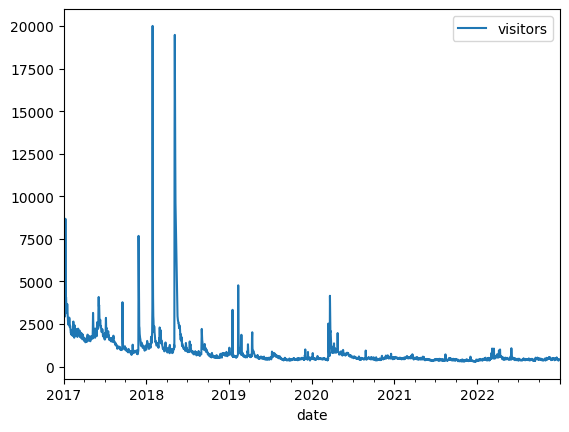

In [139]:
df_1.plot()

In [167]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_1['visitors'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('P-value: ', dftest[1])
print('No. of Lags: ', dftest[2])
print('No. of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
print('Critical Values: ')
for key, val in dftest[4].items():
    print('\t', key, ':', val)

ADF:  -15.355263096057781
P-value:  3.6740252160491595e-28
No. of Lags:  3
No. of observations used for ADF Regression and Critical Values Calculation:  2187
Critical Values: 
	 1% : -3.4333435948613777
	 5% : -2.8628624711279094
	 10% : -2.5674740166474006


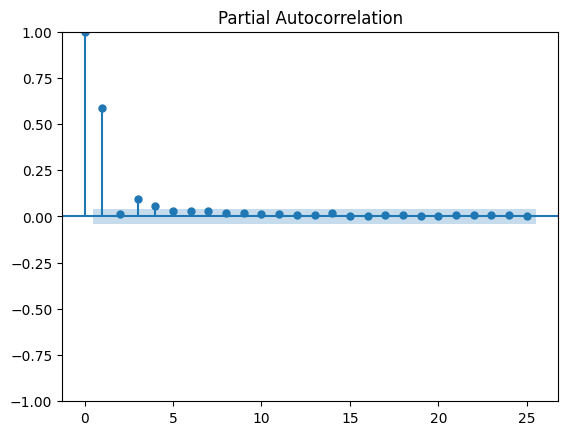

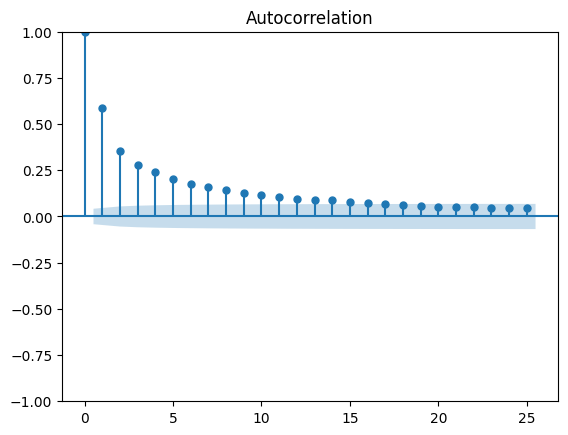

In [168]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf = plot_pacf(df_1['visitors'], lags=25)
acf = plot_acf(df_1['visitors'], lags=25)

In [169]:
train = X[:len(X) - 7]
test = X[len(X) - 7:]

In [170]:
model = AutoReg(train, lags=2).fit()

In [171]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2184
Model:                     AutoReg(2)   Log Likelihood              -23816.427
Method:               Conditional MLE   S.D. of innovations          13306.582
Date:                Thu, 02 Mar 2023   AIC                          47640.853
Time:                        14:58:26   BIC                          47663.605
Sample:                             2   HQIC                         47649.170
                                 2184                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1849.7205    298.357      6.200      0.000    1264.951    2434.490
y.L1           0.5794      0.021     27.067      0.000       0.537       0.621
y.L2           0.0142      0.021      0.663      0.5

In [172]:
print(len(train))

2184


In [173]:
pred = model.predict(start = len(train), end = len(X) - 1, dynamic = False)

[4029.13498477 4236.18596767 4361.28692428 4436.7066462  4482.17891413
 4509.59508792 4526.12487009]


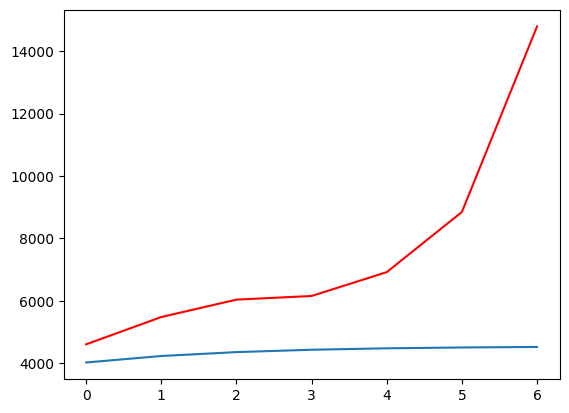

In [174]:
plt.plot(pred)
plt.plot(test, color='red')
print(pred)

In [175]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

4435.324085330221


<a id='arima'></a>
### ARIMA Model

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
articles = get_article_list()
df = get_stacked_df().loc[articles[625]]
df.fillna(0)
#df.reset_index(inplace=True)
#df.rename(columns = {'visitors':'y'}, inplace = True)
#df['ds'] = df.index
df.head()

,visitors
date,
2017-01-01,953.0
2017-01-02,1019.0
2017-01-03,1005.0
2017-01-04,1033.0
2017-01-05,1539.0


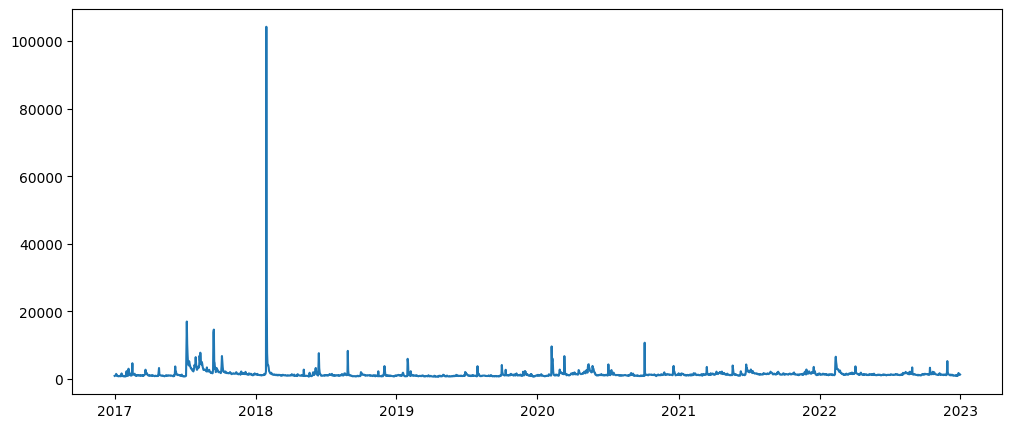

In [214]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['visitors'])
plt.show()

In [215]:
from statsmodels.tsa.stattools import adfuller

In [216]:
test_results = adfuller(df['visitors'])

In [217]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    print('ADF\t\t\t:', result[0])
    print('P-value\t\t\t: ', result[1])
    print('No. of Lags\t\t: ', result[2])
    print('No. of observations\t: ', result[3])
    print('Critical Values\t: ')
    for key, val in result[4].items():
        print('\t', key, '\t:', val)
    print()
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis (H0), time series has a unit root, indicating it is non-stationary.")

In [218]:
adfuller_test(df['visitors'])

ADF			: -17.152836199364614
P-value			:  6.92385990637018e-30
No. of Lags		:  4
No. of observations	:  2186
Critical Values	: 
	 1% 	: -3.433344965914077
	 5% 	: -2.8628630765096195
	 10% 	: -2.567474338973205

Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary.


In [219]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

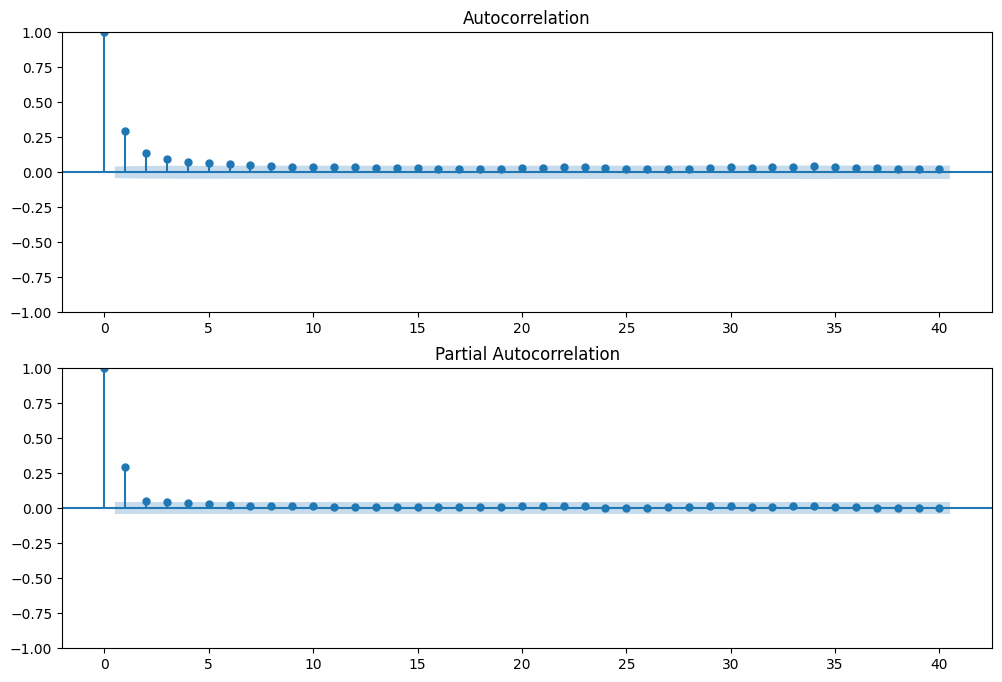

In [220]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['visitors'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['visitors'],lags=40,ax=ax2)

In [221]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [222]:
stepwise_fit = auto_arima(df['visitors'], trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41157.355, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=40803.025, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=40332.076, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=41155.356, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=40198.328, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=40197.603, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=40634.198, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=40224.235, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=40196.871, Time=0.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=40214.915, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=40209.686, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=40207.124, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[0]        

In [225]:
from statsmodels.tsa.arima.model import ARIMA

In [226]:
print(df.shape)
train = df.iloc[:-90]
test = df.iloc[-90:]
print(train.shape, test.shape)

(2191, 1)
(2101, 1) (90, 1)


In [227]:
model = ARIMA(train['visitors'], order = (1, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               visitors   No. Observations:                 2101
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -19315.446
Date:                Sun, 19 Mar 2023   AIC                          38638.891
Time:                        13:12:41   BIC                          38661.490
Sample:                    01-01-2017   HQIC                         38647.169
                         - 10-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4285      0.049      8.663      0.000       0.332       0.525
ma.L1         -1.1585      0.051    -22.637      0.000      -1.259      -1.058
ma.L2          0.1688      0.048      3.495      0.000       0.074       0.264
sigma2      6.302e+06      2e+04    314.497      0.000    6.26e+06    6.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):         229419918.04
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            37.98
Prob(H) (two-sided):                  0.00   Kurtosis:                      1620.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end, typ = 'levels')
pred_df = pd.DataFrame(pred)
pred_df

,predicted_mean
2022-10-03,1447.942680
2022-10-04,1440.831458
2022-10-05,1437.784516
2022-10-06,1436.478995
2022-10-07,1435.919619
...,...
2022-12-27,1435.500262
2022-12-28,1435.500262
2022-12-29,1435.500262
2022-12-30,1435.500262


<AxesSubplot: xlabel='date'>

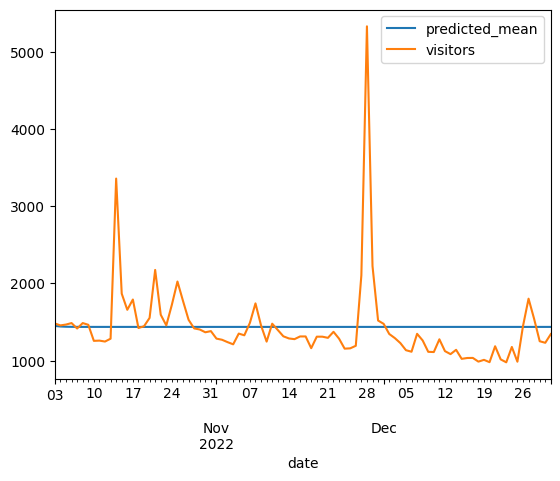

In [229]:
pred.plot(legend = True)
test['visitors'].plot(legend = True)

In [18]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(train['visitors'], order=(2, 0, 4), seasonal_order=(2, 0, 4, 365))
results = model.fit()

<a id="ridge-regression"></a>
### Machine Learning (Ridge Regression)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# set plotly parameters
import plotly.io as pio
pio.renderers.default='notebook'

In [32]:
articles = get_article_list()
visitors_df = get_stacked_df().loc[articles[437]]
visitors_df.reset_index(inplace = True)
visitors_df

,date,visitors
0,2017-01-01,17856.0
1,2017-01-02,12468.0
2,2017-01-03,16045.0
3,2017-01-04,15152.0
4,2017-01-05,14302.0
...,...,...
2186,2022-12-27,6041.0
2187,2022-12-28,6158.0
2188,2022-12-29,6921.0
2189,2022-12-30,8847.0


In [33]:
# Plot interactive plots using Plotly
def plotl(df, title):
    fig = px.line(df, x='date', y=df.columns[1:], title=title) # visitors in y axis
    fig.show()

In [34]:
# normalize the prices and plot chart for visitors
normalized_df = visitors_df.copy()
normalized_df.iloc[:, 1:] = normalized_df.iloc[:, 1:].div(normalized_df.iloc[0, 1:], axis=1)

plotl(normalized_df, 'Visitors (normalized)')

In [35]:
# build a dataframe with 3 columns: date, close price, target price (for the prediction)
df = pd.DataFrame({'date': visitors_df['date'], 'current': visitors_df['visitors']})

# Build the target prices i.e. the next day's close price
df['target'] = df['current'].shift(-1) # Target stock price today will be tomorrow's price

# Remove the last row as it will be a NaN for the target column
df = df[:-1]
df

,date,current,target
0,2017-01-01,17856.0,12468.0
1,2017-01-02,12468.0,16045.0
2,2017-01-03,16045.0,15152.0
3,2017-01-04,15152.0,14302.0
4,2017-01-05,14302.0,12642.0
...,...,...,...
2185,2022-12-26,5484.0,6041.0
2186,2022-12-27,6041.0,6158.0
2187,2022-12-28,6158.0,6921.0
2188,2022-12-29,6921.0,8847.0


In [36]:
# Scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns = ['date']))

# Creating Feature and Target
X = df_scaled[:,:1] # the close price
y = df_scaled[:,1:] # the target column

# Spliting the data this way, since order is important in time-series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=False)

train_dates = df.date[:int(len(X)*0.65)]
test_dates =  df.date[int(len(X)*0.65):]

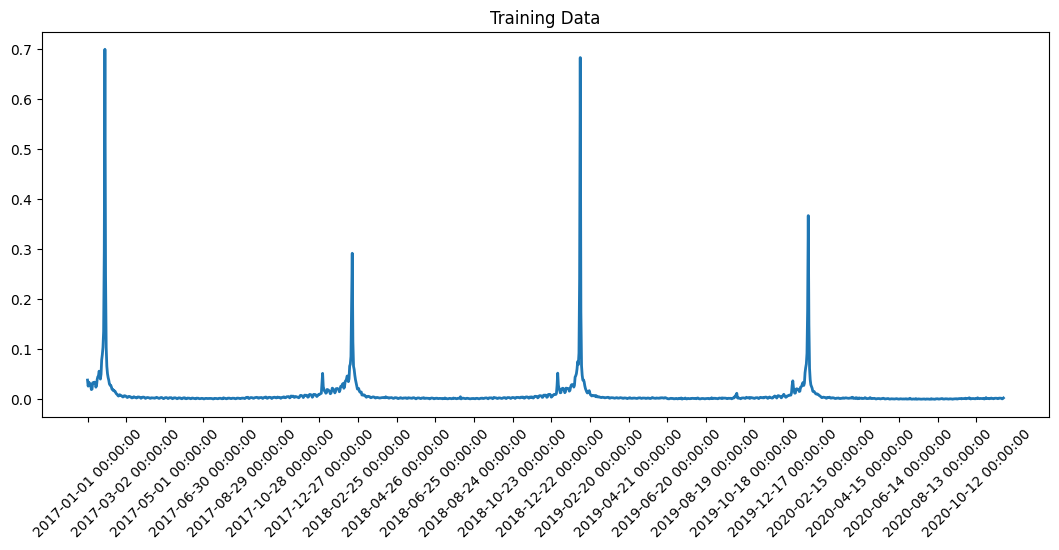

In [37]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(X_train, linewidth=2)
ax.set_xticks(range(0, len(train_dates.values), 60))
ax.set_xticklabels(pd.to_datetime(train_dates.values[::60]), rotation=45)
ax.set_title('Training Data')
plt.show()

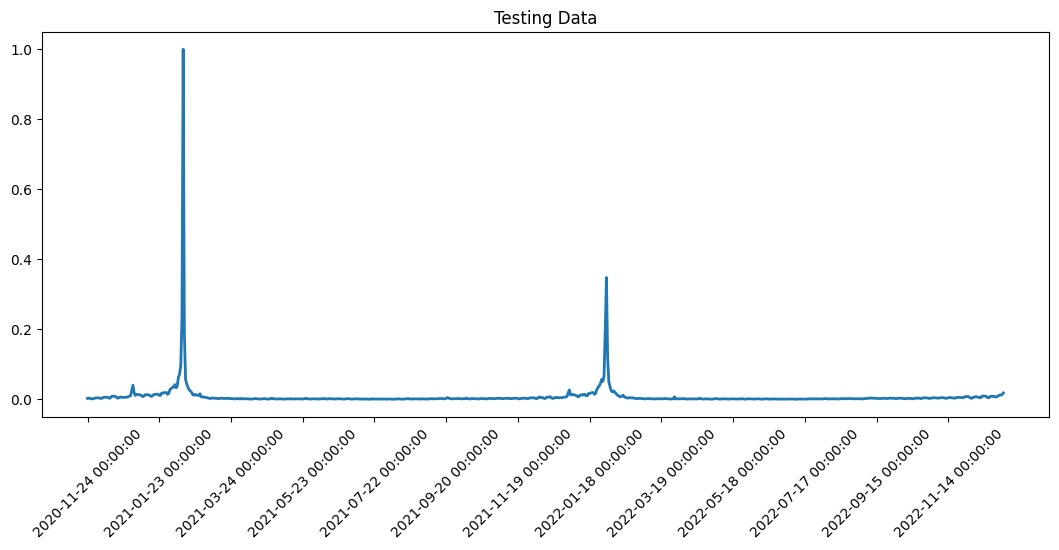

In [38]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(X_test, linewidth=2)
ax.set_xticks(range(0, len(test_dates.values), 60))
ax.set_xticklabels(pd.to_datetime(test_dates.values[::60]), rotation=45)
ax.set_title('Testing Data')
plt.show()

In [39]:
# Build the Ridge model
regression_model = Ridge()

# fit using the training data
regression_model.fit(X_train, y_train)


# Calculate its coefficient of determination of the prediction on the test data
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression coefficient of determination of the prediction: ", lr_accuracy)

# Make Prediction on whole dataset to plot them below against the true "close" prices.
predicted_visitors = regression_model.predict(X)

Linear Regression coefficient of determination of the prediction:  0.21742712135243136


In [40]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = df[['date']]
df_predicted['Visitors'] = df_scaled[:,0]
df_predicted['Predicted'] = predicted_visitors

# Plot the true vs predicted prices and a vertical line at 
# the point where the training set ends and the testing starts
fig = px.line(df_predicted, x='date', y=df_predicted.columns[1:], title="Original Vs. Prediction")
fig.add_vline(x=df_predicted.date[1422])
plt.savefig("pred.png", dpi=300, bbox_inches="tight")
fig.show()

C:\Users\amalc\AppData\Local\Temp\ipykernel_18408\1526943491.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 640x480 with 0 Axes>

<a id='lstm'></a>
### Deep Learning (LSTM)

In [41]:
# Get the close data as input data
input_data = df.current.values # get the close price (true prices)
input_data = input_data.reshape(-1,1) # reshape to column vector

# scale to [0,1] again
sc = MinMaxScaler()
input_scaled = sc.fit_transform(input_data)
input_scaled

array([[0.03840801],
       [0.02631248],
       [0.03434249],
       ...,
       [0.01214716],
       [0.01386002],
       [0.0181837 ]])

In [42]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(input_scaled)):
    X.append(input_scaled[i-1:i, 0])
    y.append(input_scaled[i, 0])
    
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [43]:
X[:5],y[:5]

(array([[0.03840801],
        [0.02631248],
        [0.03434249],
        [0.03233779],
        [0.03042963]]),
 array([0.02631248, 0.03434249, 0.03233779, 0.03042963, 0.02670309]))

In [44]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=False)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1422, 1, 1), (767, 1, 1))

In [45]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [46]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.2
)

# estimate the R2 on the test set
print("LSTM coefficient of determination of the prediction: ", r2_score(y_test, model.predict(X_test)))

Epoch 1/50
36/36 [==============================] - 7s 55ms/step - loss: 0.0015 - val_loss: 7.1574e-05
Epoch 2/50
36/36 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 8.8037e-05
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 4.5074e-05
Epoch 4/50
36/36 [==============================] - 0s 8ms/step - loss: 8.5587e-04 - val_loss: 1.1166e-04
Epoch 5/50
36/36 [==============================] - 0s 8ms/step - loss: 9.3328e-04 - val_loss: 3.5573e-07
Epoch 6/50
36/36 [==============================] - 0s 8ms/step - loss: 8.6290e-04 - val_loss: 1.0284e-04
Epoch 7/50
36/36 [==============================] - 0s 8ms/step - loss: 8.7835e-04 - val_loss: 1.0253e-05
Epoch 8/50
36/36 [==============================] - 0s 8ms/step - loss: 9.5759e-04 - val_loss: 2.2608e-04
Epoch 9/50
36/36 [==============================] - 0s 8ms/step - loss: 7.9808e-04 - val_loss: 3.2181e-07
Epoch 10/50
36/36 [==============================] - 0s 

In [47]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [48]:
predicted = model.predict(X)

69/69 [==============================] - 0s 3ms/step


In [49]:
# Make prediction
#predicted = model.predict(X)

# make list
predicted = predicted.ravel().tolist()

# make dataframe
df_predicted = df[1:][['date']]
df_predicted['predictions'] = predicted
df_predicted['Visitors'] = input_scaled[1:]
df_predicted

# Plot the data
fig = px.line(df_predicted, x='date', y=df_predicted.columns[1:], title="Original Vs Prediction")
fig.add_vline(x=df_predicted.date[1798])
fig.show()

<a id='prophet'></a>
### Facebook Prophet

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
import matplotlib.pyplot as plt

In [652]:
articles = get_article_list()
data = get_stacked_df().loc[articles[2445]]
#data.reset_index(inplace=True)
data.rename(columns = {'visitors': 'y'}, inplace = True)
data['ds'] = data.index
data.head()

,y,ds
date,,
2017-01-01,2244.0,2017-01-01
2017-01-02,3572.0,2017-01-02
2017-01-03,4638.0,2017-01-03
2017-01-04,4991.0,2017-01-04
2017-01-05,4996.0,2017-01-05


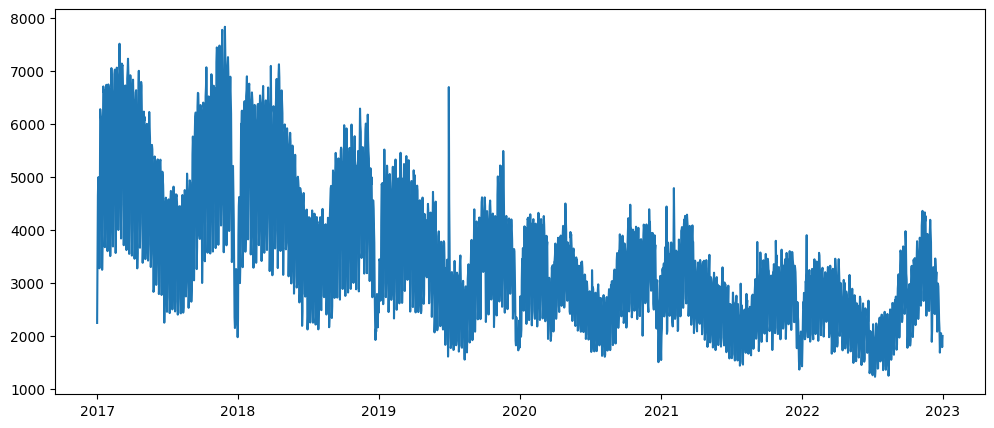

In [653]:
plt.figure(figsize=(12, 5))
plt.plot(data['ds'], data['y'])
plt.show()

In [654]:
size = 90
from sklearn.model_selection import train_test_split

In [655]:
train, test = train_test_split(data, test_size = size/len(data), shuffle = False)

In [656]:
train

,y,ds
date,,
2017-01-01,2244.0,2017-01-01
2017-01-02,3572.0,2017-01-02
2017-01-03,4638.0,2017-01-03
2017-01-04,4991.0,2017-01-04
2017-01-05,4996.0,2017-01-05
...,...,...
2022-09-28,3177.0,2022-09-28
2022-09-29,3065.0,2022-09-29
2022-09-30,2622.0,2022-09-30


In [657]:
test.head()

,y,ds
date,,
2022-10-03,2774.0,2022-10-03
2022-10-04,2781.0,2022-10-04
2022-10-05,2901.0,2022-10-05
2022-10-06,2977.0,2022-10-06
2022-10-07,2604.0,2022-10-07


In [658]:
model = Prophet(yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 1)
model.fit(train)

11:31:25 - cmdstanpy - INFO - Chain [1] start processing
11:31:25 - cmdstanpy - INFO - Chain [1] done processing


In [659]:
future = model.make_future_dataframe(periods = size)
future

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
2186,2022-12-27
2187,2022-12-28
2188,2022-12-29
2189,2022-12-30


In [660]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,5253.295446,2752.968305,3924.928557,5253.295446,5253.295446,-1890.642294,-1890.642294,-1890.642294,-946.686592,-946.686592,-946.686592,-943.955702,-943.955702,-943.955702,0.0,0.0,0.0,3362.653152
1,2017-01-02,5251.903432,4308.993249,5369.755230,5251.903432,5251.903432,-420.223618,-420.223618,-420.223618,465.850743,465.850743,465.850743,-886.074361,-886.074361,-886.074361,0.0,0.0,0.0,4831.679814
2,2017-01-03,5250.511419,4542.224303,5662.308297,5250.511419,5250.511419,-155.958692,-155.958692,-155.958692,661.876854,661.876854,661.876854,-817.835546,-817.835546,-817.835546,0.0,0.0,0.0,5094.552726
3,2017-01-04,5249.119405,4591.622533,5750.003744,5249.119405,5249.119405,-103.183379,-103.183379,-103.183379,637.304007,637.304007,637.304007,-740.487386,-740.487386,-740.487386,0.0,0.0,0.0,5145.936027
4,2017-01-05,5247.727392,4535.062475,5676.829058,5247.727392,5247.727392,-172.533446,-172.533446,-172.533446,482.889802,482.889802,482.889802,-655.423248,-655.423248,-655.423248,0.0,0.0,0.0,5075.193946


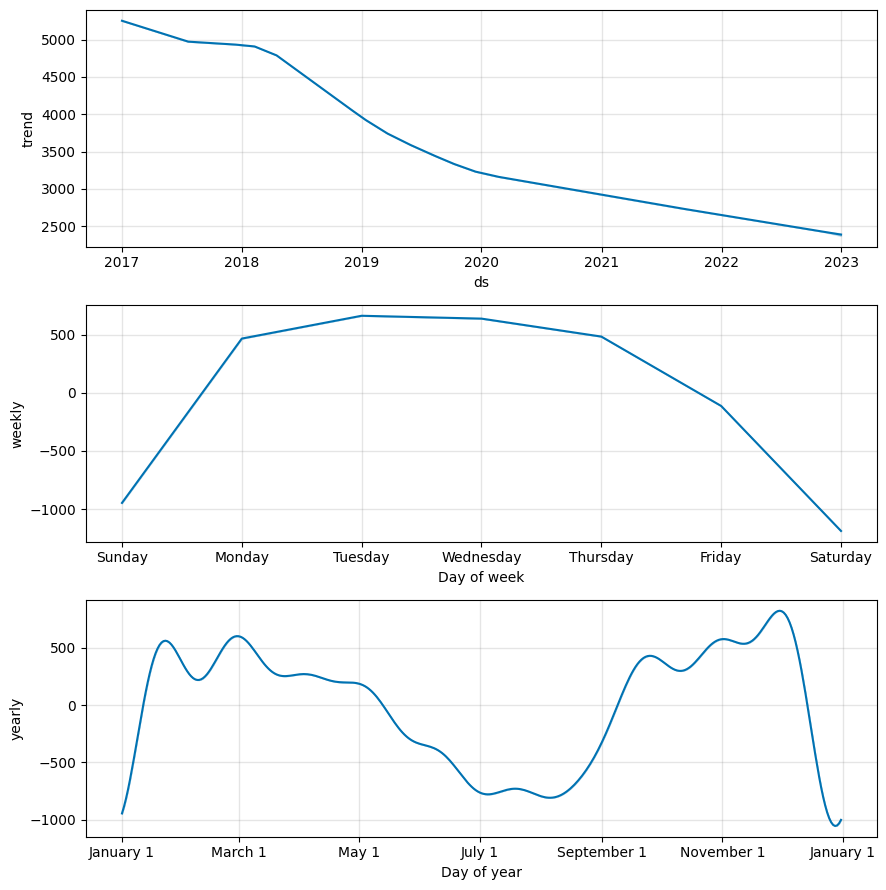

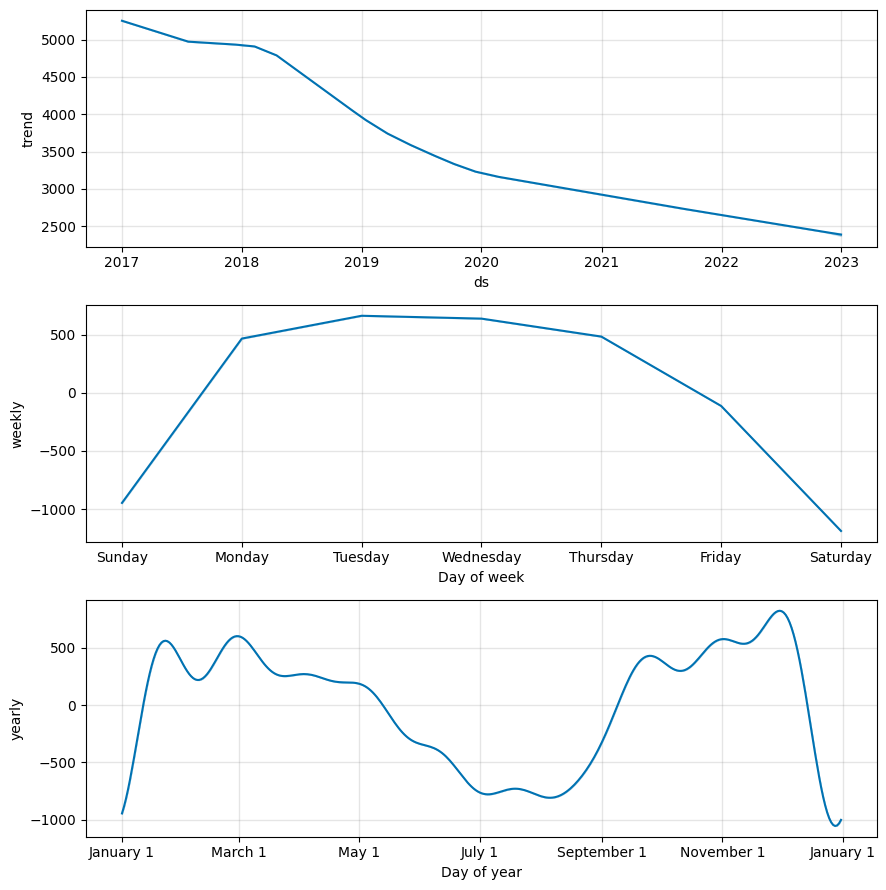

In [661]:
model.plot_components(forecast)

In [662]:
pred = forecast.iloc[-90:, :]

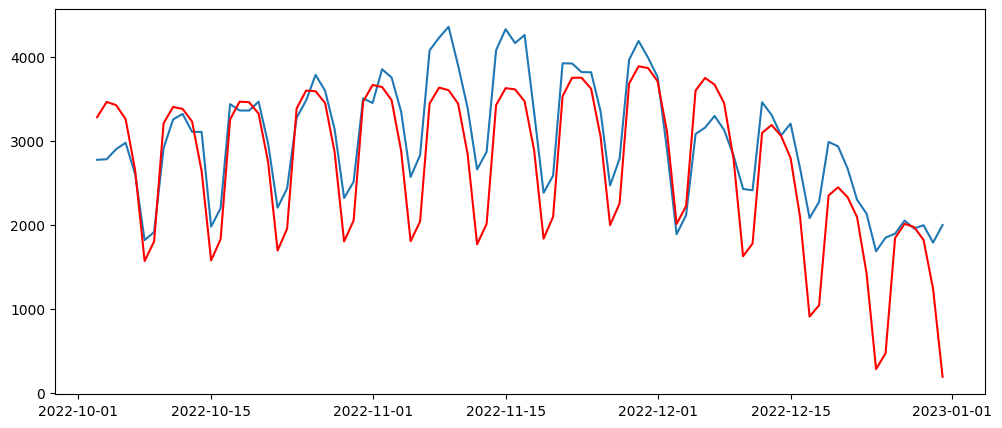

In [663]:
plt.figure(figsize = (12, 5))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color = 'red')
#plt.plot(pred['ds'], pred['yhat_lower'], color = 'green')
#plt.plot(pred['ds'], pred['yhat_upper'], color = 'blue')
plt.show()

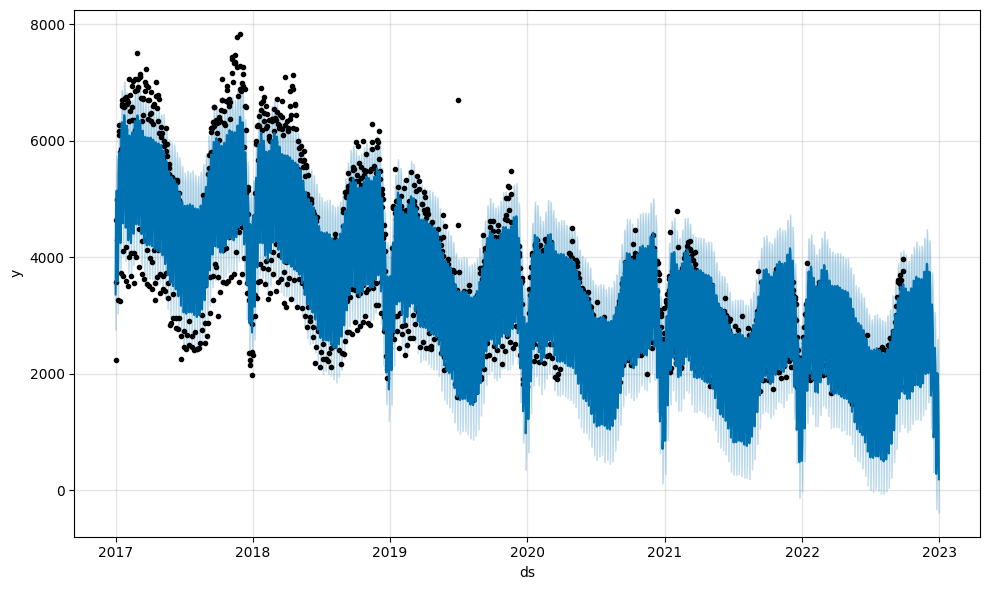

In [664]:
fig1 = model.plot(forecast)

<a id='elm'></a>
### Extreme Learning Machines (ELM)
[Link](https://www.analyticsvidhya.com/blog/2021/12/time-series-forecasting-with-extreme-learning-machines/?)

In [335]:
articles = get_article_list()
df = get_stacked_df().loc[articles[124]]
df

,visitors
date,
2017-01-01,7392.0
2017-01-02,7406.0
2017-01-03,8486.0
2017-01-04,7702.0
2017-01-05,7630.0
...,...
2022-12-27,7413.0
2022-12-28,7256.0
2022-12-29,7462.0


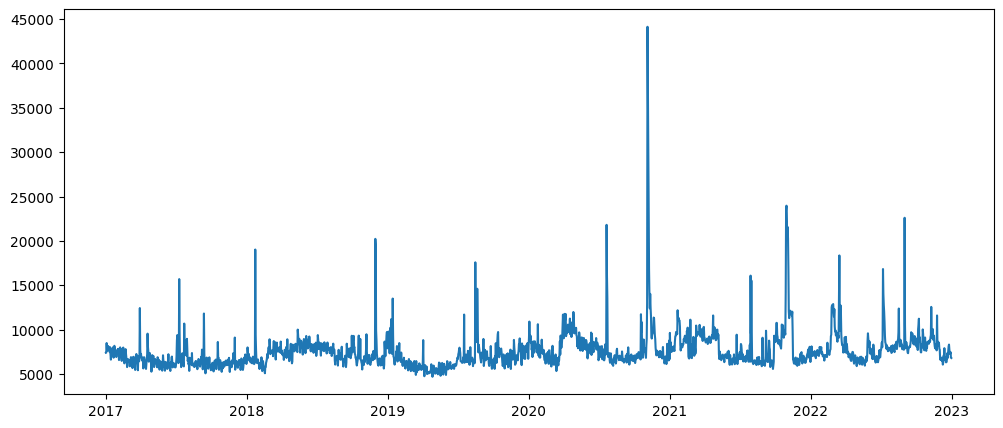

In [336]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['visitors'])
plt.show()

In [337]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from scipy.linalg import pinv

data = np.array(df)
data = np.reshape(data, (-1, 1))
data

array([[7392.],
       [7406.],
       [8486.],
       ...,
       [7462.],
       [6842.],
       [6800.]])

In [338]:
lag = 14
pred_length = 90
per = (len(data) - pred_length - lag)/len(data)
size = int(len(data) * per)
d_train, d_test = data[0:size], data[size:len(data)]
mean_train = np.mean(d_train)
sd_train = np.std(d_train)
d_train = (d_train-mean_train)/sd_train
d_test = (d_test-mean_train)/sd_train

In [339]:
X_train = np.array([d_train[i][0] for i in range(m)])
y_train = np.array(d_train[m][0])
for i in range(1,(d_train.shape[0]-m)):
    l = np.array([d_train[j][0] for j in range(i,i+m)])
    X_train = np.vstack([X_train,l])
    y_train = np.vstack([y_train,d_train[i+m]])
X_test = np.array([d_test[i][0] for i in range(m)])
y_test = np.array(d_test[m][0])
for i in range(1,(d_test.shape[0]-m)):
    l = np.array([d_test[j][0] for j in range(i,i+m)])
    X_test = np.vstack([X_test,l])
    y_test = np.vstack([y_test,d_test[i+m]])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2073, 14)
(2073, 1)
(90, 14)
(90, 1)


In [340]:
import scipy.stats as stats

input_size = X_train.shape[1]
hidden_size = 100   #no. of hidden neurons
mu, sigma = 0, 1
w_lo = -1 
w_hi = 1
b_lo = -1 
b_hi = 1
#initialising input weights and biases randomly drawn from a truncated normal distribution
input_weights = stats.truncnorm.rvs((w_lo - mu) / sigma, (w_hi - mu) / sigma, loc=mu,
                                    scale=sigma, size=[input_size,hidden_size])
biases = stats.truncnorm.rvs((b_lo - mu) / sigma, (b_hi - mu) / sigma, loc=mu, scale=sigma,size=[hidden_size])
def relu(x):      #hidden layer activation function
    return np.maximum(x, 0, x)

In [341]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H
output_weights = np.dot(pinv(hidden_nodes(X_train)), y_train)
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out
prediction = predict(X_test)

In [342]:
correct = 0
total = X_test.shape[0]
y_test = (y_test*sd_train) + mean_train
prediction = (prediction*sd_train) + mean_train
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(y_test, prediction))
print('Test RMSE: %.3f' % rmse)
mape_sum = 0
for i,j in zip(y_test,prediction):
    mape_sum = mape_sum + (abs((i-j)/i))
mape = (mape_sum/total)*100
mpe_sum = 0
for i,j in zip(y_test,prediction):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/total)*100
print('Test MAPE: %.3f' % mape)
print('Test MPE: %.3f' % mpe)

Test RMSE: 918.650
Test MAPE: 7.513
Test MPE: -1.448


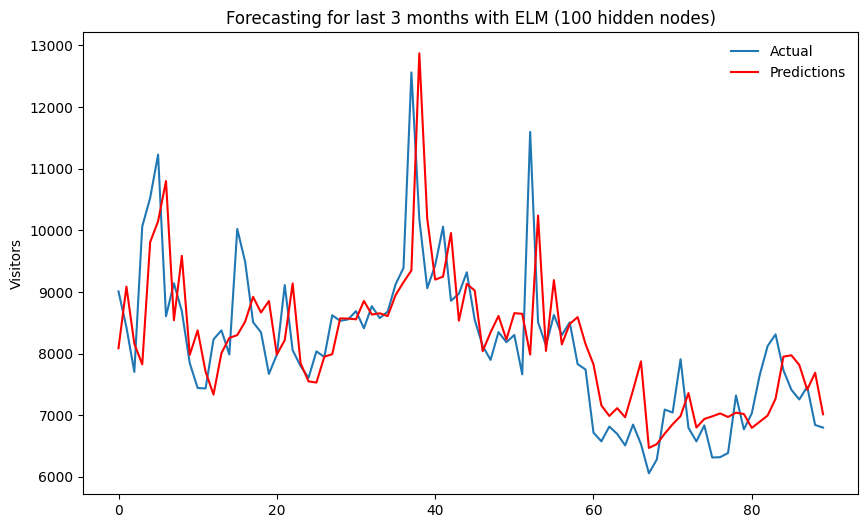

In [343]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(y_test, label = 'Actual')
ax.plot(prediction, color='red',label = 'Predictions')
ax.legend(loc='upper right', frameon=False)
#plt.xlabel('Days',fontname="Arial", fontsize=24, style='italic', fontweight='bold')
plt.ylabel('Visitors')
plt.title('Forecasting for last 3 months with ELM (100 hidden nodes)')
dates = df.index[-90:]
#plt.xticks([0,20,40,60,80],['2017-10-02','2017-10-22','2017-11-11','2017-12-01','2017-12-21'],fontname="Arial", fontsize = 20, style='italic')

In [138]:
df_pred = pd.DataFrame({'actual': y_test.flatten(), 'predictions': prediction.flatten()}, index = df.index[-90:])

In [139]:
df_pred

,actual,predictions
date,,
2022-10-03,416.0,482.176280
2022-10-04,452.0,343.645366
2022-10-05,455.0,468.982303
2022-10-06,443.0,499.544324
2022-10-07,409.0,403.640332
...,...,...
2022-12-27,411.0,448.429544
2022-12-28,428.0,476.763029
2022-12-29,423.0,416.019127


### RNN
[Link](https://www.youtube.com/watch?v=S8tpSG6Q2H0&list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP&index=10)

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [364]:
articles = get_article_list()
df = get_stacked_df().loc[articles[0]]
df.head()

,visitors
date,
2017-01-01,3012.0
2017-01-02,3758.0
2017-01-03,4342.0
2017-01-04,3990.0
2017-01-05,3598.0


<AxesSubplot: xlabel='date'>

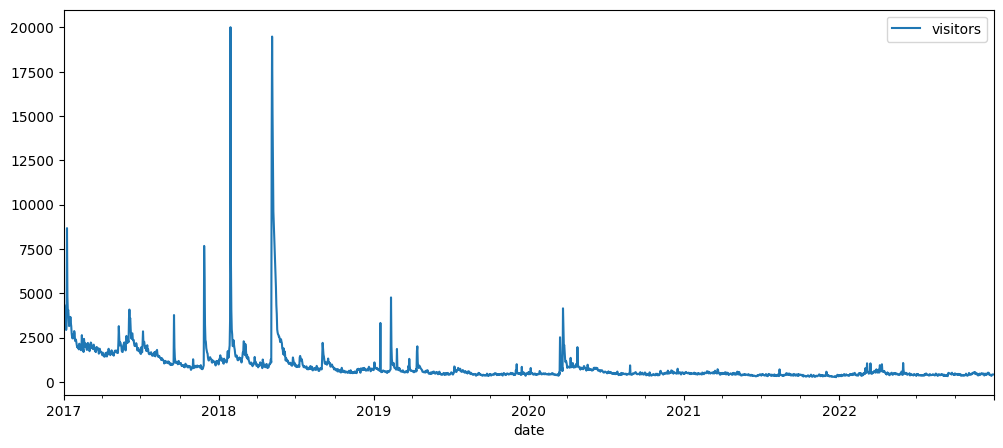

In [365]:
df.plot(figsize=(12, 5))

In [367]:
from statsmodels.tsa.seasonal import seasonal_decompose

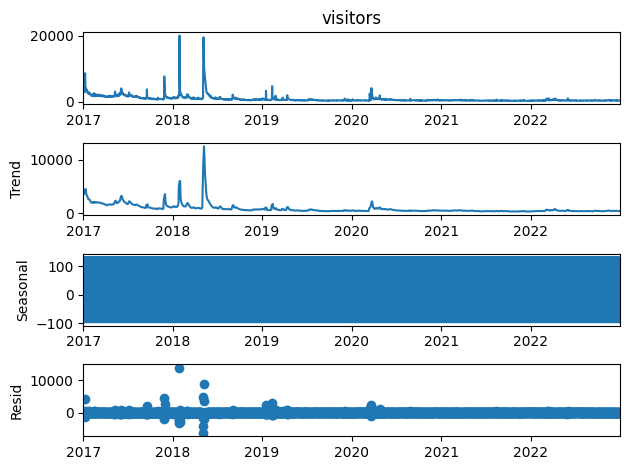

In [369]:
results = seasonal_decompose(df['visitors'])
results.plot();

In [370]:
len(df)

2191

In [371]:
train = df.iloc[:2101]
test = df.iloc[2101:]

In [373]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [376]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [377]:
scaled_train[:10]

array([[0.13886215],
       [0.17665535],
       [0.20624145],
       [0.18840873],
       [0.16854957],
       [0.15502305],
       [0.13506257],
       [0.14484016],
       [0.42595876],
       [0.22903896]])

In [378]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [379]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [380]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.13886215 0.17665535 0.20624145]
Predict this y: 
 [[0.18840873]]


In [381]:
X.shape

(1, 3, 1)

In [382]:
# We do the same thing, but now instead for 12 months
n_input = 90
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [383]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [384]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [385]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [386]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
2011/2011 [==============================] - 30s 15ms/step - loss: 0.0014
Epoch 2/50
2011/2011 [==============================] - 28s 14ms/step - loss: 0.0012
Epoch 3/50
2011/2011 [==============================] - 29s 14ms/step - loss: 0.0012
Epoch 4/50
2011/2011 [==============================] - 29s 15ms/step - loss: 0.0011
Epoch 5/50
2011/2011 [==============================] - 29s 14ms/step - loss: 0.0011
Epoch 6/50
2011/2011 [==============================] - 29s 14ms/step - loss: 0.0011
Epoch 7/50
2011/2011 [==============================] - 29s 14ms/step - loss: 0.0010
Epoch 8/50
2011/2011 [==============================] - 29s 15ms/step - loss: 0.0011
Epoch 9/50
2011/2011 [==============================] - 30s 15ms/step - loss: 0.0011
Epoch 10/50
2011/2011 [==============================] - 30s 15ms/step - loss: 0.0011
Epoch 11/50
2011/2011 [==============================] - 29s 15ms/step - loss: 0.0011
Epoch 12/50
2011/2011 [==============================] - 29s 14

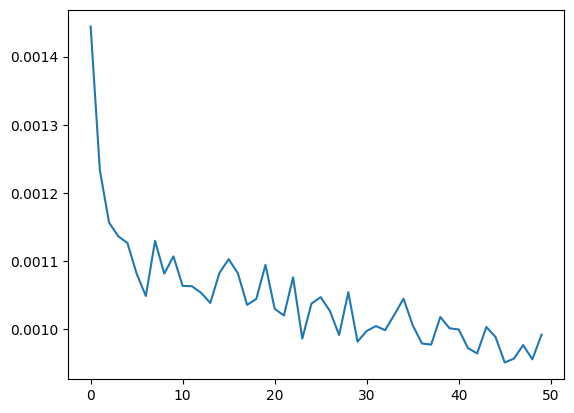

In [387]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [388]:
last_train_batch = scaled_train[-90:]

In [389]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [390]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 164ms/step


array([[0.02225694]], dtype=float32)

In [391]:
scaled_test[0]

array([0.00734586])

In [392]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [393]:
test_predictions

[array([0.02225694], dtype=float32),
 array([0.03169952], dtype=float32),
 array([0.04007509], dtype=float32),
 array([0.04918567], dtype=float32),
 array([0.06151827], dtype=float32),
 array([0.07815871], dtype=float32),
 array([0.10169894], dtype=float32),
 array([0.1323637], dtype=float32),
 array([0.16098258], dtype=float32),
 array([0.18278015], dtype=float32),
 array([0.19707082], dtype=float32),
 array([0.20476246], dtype=float32),
 array([0.20729434], dtype=float32),
 array([0.2061432], dtype=float32),
 array([0.20261773], dtype=float32),
 array([0.19778976], dtype=float32),
 array([0.19248602], dtype=float32),
 array([0.1873061], dtype=float32),
 array([0.18265095], dtype=float32),
 array([0.1787552], dtype=float32),
 array([0.1757201], dtype=float32),
 array([0.17354535], dtype=float32),
 array([0.17215899], dtype=float32),
 array([0.17144383], dtype=float32),
 array([0.1712603], dtype=float32),
 array([0.1714646], dtype=float32),
 array([0.17192227], dtype=float32),
 array([

In [394]:
test.head()

,visitors
date,
2022-10-03,416.0
2022-10-04,452.0
2022-10-05,455.0
2022-10-06,443.0
2022-10-07,409.0


In [395]:
true_predictions = scaler.inverse_transform(test_predictions)

In [397]:
test['Predictions'] = true_predictions

<AxesSubplot: xlabel='date'>

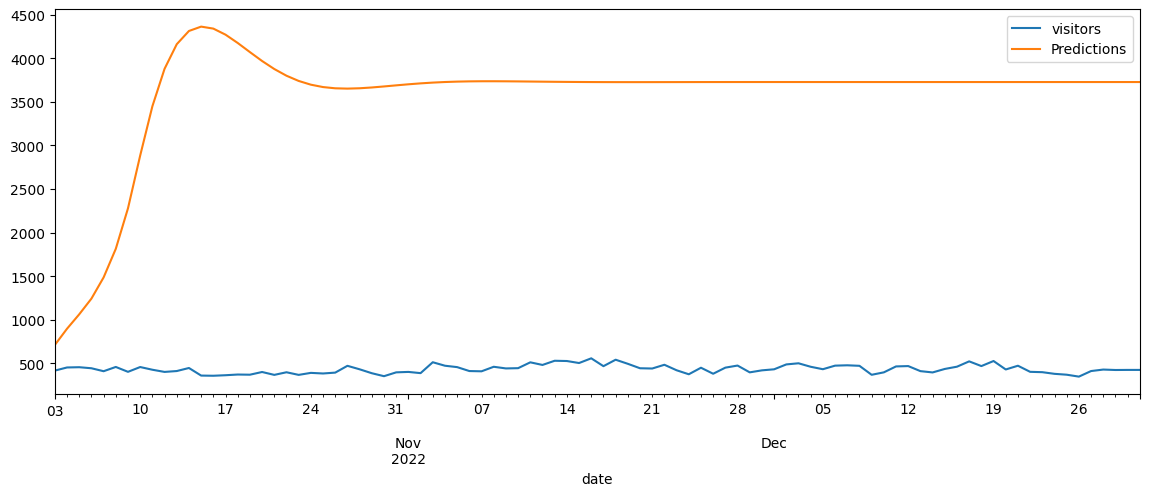

In [398]:
test.plot(figsize=(14,5))

In [400]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['visitors'],test['Predictions']))
print(rmse)

3213.106331833258
